In [1]:
#this is for logistric regression HW

In [367]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt


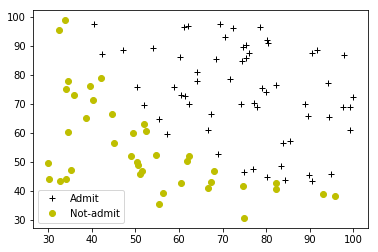

In [29]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex2\machine-learning-ex2\ex2\ex2data1.txt", header=None)
tt0 = tt[tt[2]==0]
tt1 = tt[tt[2]==1]
tt.columns = ['score0', 'score1', 'Admit?']
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
# m = len(tt[0].tolist())
# plt.xlabel('Population in 10,000s')
# plt.ylabel('Profit in $10,000s')


In [85]:
def sigmoid(x):
    #z = np.dot(theta.transpose(), X)
    g = 1/(1 + np.exp(-x))
    return g

In [36]:
theta = np.zeros((2,1))
X = theta
sigmoid(theta, X)

array([[0.5]])

In [237]:
def costFunction(theta, X, y):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    b = (-y)*np.log(sigmoid(x))-(1-y)*np.log(1-sigmoid(x))
    J = 1/m*b.sum()
    tmp = (sigmoid(x) - y)
    for i in range(X.shape[0]):
        delta_J[i] = 1/m*(np.multiply(tmp, X[i])).sum()
    return J, delta_J

In [289]:
X = np.array([np.ones(len(tt)).tolist(), tt['score0'].tolist(), tt['score1'].tolist()])
y = np.array([tt['Admit?'].tolist()])
initial_theta = np.zeros((3,1))


In [290]:
[cost, grad] = costFunction(initial_theta, X, y)
print(cost)
print(grad)

0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]


In [277]:
X = np.array([np.ones(len(tt)).tolist(), tt['score0'].tolist(), tt['score1'].tolist()])
y = np.array([tt['Admit?'].tolist()])
initial_theta = np.zeros((3,1))


In [278]:
def costFunc(theta, X, y):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    b = (-y)*np.log(sigmoid(x))-(1-y)*np.log(1-sigmoid(x))
    J = 1/m*b.sum()
    return J

In [308]:
def Grad(theta, X, y):
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    tmp = (sigmoid(x) - y)
    for i in range(X.shape[0]):
        delta_J[i] = 1/m*(np.multiply(tmp, X[i])).sum()
    return delta_J

In [309]:
Grad(initial_theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [310]:
result = opt.fmin_tnc(func=costFunc, x0=initial_theta, fprime=Grad, args=(X, y))  
result

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [311]:
costFunc(result[0], X, y)  

0.20349770158947494

In [342]:
def predict(theta, X):  
    prob = sigmoid(np.dot(theta.transpose(),X))
    return [1 if x >= 0.5 else 0 for x in prob]

theta_min = np.array(result[0])  
predictions = predict(theta_min, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y.transpose())]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))


accuracy = 89%


In [363]:
#To plot the decision boundary, h>0 => theta.transpose()*X >0
#the decision boundary is the line for h(x) = 0
#To calculate 2 sets of (x1,x2), using the theta_min as the hint
x2_1 = (-theta_min[0] - theta_min[1]*30)/theta_min[2]
x2_2 = (-theta_min[0] - theta_min[1]*100)/theta_min[2]

Text(0,0.5,'score1')

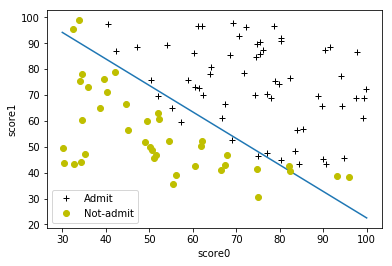

In [364]:
plt.plot([30, 100], [x2_1, x2_2])
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
plt.xlabel('score0')
plt.ylabel('score1')

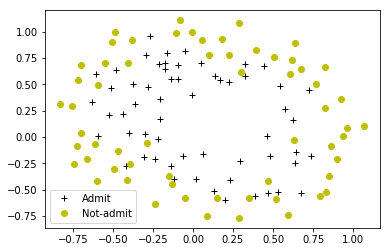

In [365]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex2\machine-learning-ex2\ex2\ex2data2.txt", header=None)
tt0 = tt[tt[2]==0]
tt1 = tt[tt[2]==1]
tt.columns = ['score0', 'score1', 'Admit?']
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
# m = len(tt[0].tolist())
# plt.xlabel('Population in 10,000s')
# plt.ylabel('Profit in $10,000s')


In [706]:
def mapFeature(X1, X2, degree):
    #e_size = 1
    e_size = X1.size
    out = np.ones((e_size))
    #print(out.shape)
    for i in range(1,degree+1):
        for j in range(i+1):
            new = np.multiply(np.power(X1,(i-j)),np.power(X2,j))
            out = np.vstack([out, new])
    return out

In [603]:
def costFunctionReg(theta, X, y, lamdba):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    b = (-y)*np.log(sigmoid(x))-(1-y)*np.log(1-sigmoid(x))
    c = lamdba/(2*m)*(np.square(theta).sum() - np.square(theta[0]))
    J = 1/m*b.sum()+c
    tmp = (sigmoid(x) - y)
    for j in (range(1, X.shape[0]-1)):
        delta_J[j] = 1/m*(np.multiply(tmp, X[j])).sum()+(lamdba/m*theta[j])
    delta_J[0] = 1/m*(np.multiply(tmp, X[0])).sum()
    return J

In [596]:
def GradReg(theta, X, y, lamdba):
    J = 0
    m = y.size
    delta_J = np.zeros(X.shape[0])
    x = np.dot(theta.transpose(), X)
    b = (-y)*np.log(sigmoid(x))-(1-y)*np.log(1-sigmoid(x))
    c = lamdba/(2*m)*(np.square(theta).sum() - np.square(theta[0]))
    J = 1/m*b.sum()+c
    tmp = (sigmoid(x) - y)
    for j in (range(1, X.shape[0]-1)):
        delta_J[j] = 1/m*(np.multiply(tmp, X[j])).sum()+(lamdba/m*theta[j])
    delta_J[0] = 1/m*(np.multiply(tmp, X[0])).sum()
    return delta_J

In [707]:
#setup the input variable
numpy_matrix = tt.as_matrix()
X = mapFeature(numpy_matrix[:,0], numpy_matrix[:,1], 6)
initial_theta=np.zeros(X.shape[0])
lamdba = 1
y = numpy_matrix[:,2]

C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [599]:
#calculate the cost function with learning rate = 1
j, delta_J= costFunctionReg(initial_theta, X, y, 1)

In [600]:
#cost function and the gradiant of the cost function for the  first 5 terms
print(j)
print(delta_J[0:5])

0.6931471805599454
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [601]:
#calculate the cost function with learning rate = 10 & test theta
test_theta=np.ones(X.shape[0])
j, delta_J= costFunctionReg(test_theta, X, y, 10)
#j

In [602]:
#cost function and the gradiant of the cost function for the  first 5 terms
print(j)
print(delta_J[0:5])

3.1645093316150095
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [697]:
#Use fmin_tnc find optimum results
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=GradReg, args=(X, y, lamdba))  
#The lowest cost with optimum results
minJ = costFunctionReg(result[0], X, y, lamdba)  
print(minJ)

0.5335419192246618


In [698]:
#visiulize the results:
v = np.linspace(-2, 2, 100)
u = np.linspace(-2, 2, 100)
theta_min = np.array(result[0])

In [699]:
z = np.zeros((len(u), len(v)))

In [708]:
for i in range(len(v)):
    for j in range(len(u)):
        z[i, j] = np.dot(mapFeature(np.array((v[i])), np.array((u[j])), 6).transpose(), theta_min)


(-0.9, 1.2)

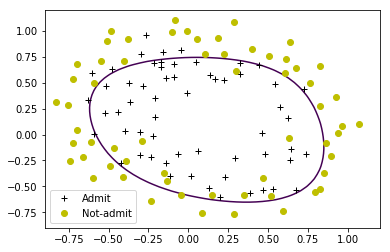

In [709]:
#Visualize the results with Decision boundary
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex2\machine-learning-ex2\ex2\ex2data2.txt", header=None)
tt0 = tt[tt[2]==0]
tt1 = tt[tt[2]==1]
tt.columns = ['score0', 'score1', 'Admit?']
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
plt.contour(u, v, z, 0)
plt.xlim(-0.9, 1.2)
plt.ylim(-0.9, 1.2)



In [720]:
#overfitting
#Use fmin_tnc find optimum results
lamdba=0.0005
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=GradReg, args=(X, y, lamdba))  
#The lowest cost with optimum results
minJ = costFunctionReg(result[0], X, y, lamdba)  
print(minJ)

0.29891074787339894


Text(0.5,1,'overfit with learning = 0.0005')

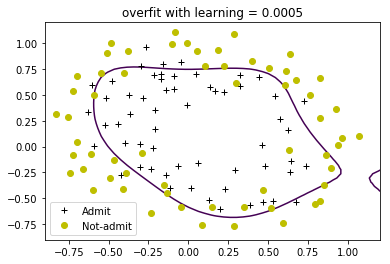

In [721]:
#visiulize the results:
v = np.linspace(-2, 2, 100)
u = np.linspace(-2, 2, 100)
theta_min = np.array(result[0])
z = np.zeros((len(u), len(v)))
for i in range(len(v)):
    for j in range(len(u)):
        z[i, j] = np.dot(mapFeature(np.array((v[i])), np.array((u[j])), 6).transpose(), theta_min)

#Visualize the results with Decision boundary
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex2\machine-learning-ex2\ex2\ex2data2.txt", header=None)
tt0 = tt[tt[2]==0]
tt1 = tt[tt[2]==1]
tt.columns = ['score0', 'score1', 'Admit?']
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
plt.contour(u, v, z, 0)
plt.xlim(-0.9, 1.2)
plt.ylim(-0.9, 1.2)
plt.title('overfit with learning = 0.0005')


In [722]:
#underfitting
#Use fmin_tnc find optimum results
lamdba=100
result = opt.fmin_tnc(func=costFunctionReg, x0=initial_theta, fprime=GradReg, args=(X, y, lamdba))  
#The lowest cost with optimum results
minJ = costFunctionReg(result[0], X, y, lamdba)  
print(minJ)

0.6872156582591483


Text(0.5,1,'underfitting with learning = 100')

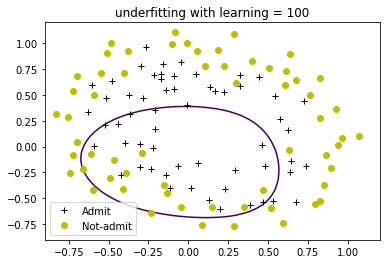

In [723]:
#visiulize the results:
v = np.linspace(-2, 2, 100)
u = np.linspace(-2, 2, 100)
theta_min = np.array(result[0])
z = np.zeros((len(u), len(v)))
for i in range(len(v)):
    for j in range(len(u)):
        z[i, j] = np.dot(mapFeature(np.array((v[i])), np.array((u[j])), 6).transpose(), theta_min)

#Visualize the results with Decision boundary
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex2\machine-learning-ex2\ex2\ex2data2.txt", header=None)
tt0 = tt[tt[2]==0]
tt1 = tt[tt[2]==1]
tt.columns = ['score0', 'score1', 'Admit?']
plt.plot(tt1[0].tolist(), tt1[1].tolist(), 'k+', label='Admit')
plt.plot(tt0[0].tolist(), tt0[1].tolist(), 'yo', label='Not-admit')
plt.legend()
plt.contour(u, v, z, 0)
plt.xlim(-0.9, 1.2)
plt.ylim(-0.9, 1.2)
plt.title('underfitting with learning = 100')
